<a href="https://colab.research.google.com/github/Manish-Singh-Mehra/Spam_SMS_Pridector/blob/main/SMS_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = '/content/drive/MyDrive/Colab Notebooks/Spam Classifier/SMS Spam Classifier/spam.csv'

In [ ]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [ ]:
df = pd.read_csv(file,encoding='Windows-1252')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

# Data Cleaning


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#dropping last 3 columns as they contain few values
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
4345,ham,You still around? I could use a half-8th
1166,ham,I am not having her number sir
3371,ham,And now electricity just went out fml.
2278,ham,Hmm...Bad news...Hype park plaza $700 studio t...
4410,ham,Ya but it cant display internal subs so i gott...


In [ ]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.sample(5)

,target,text
2009,ham,I can't keep going through this. It was never ...
4083,ham,Quite ok but a bit ex... U better go eat smth ...
4660,ham,Ok no prob...
106,ham,"Aight, I'll hit you up when I get some cash"
5025,spam,Ur cash-balance is currently 500 pounds - to m...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Check for missing value if any
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
# Check for duplicate values
df.duplicated().sum()

403

In [ ]:
# Remove Duplicate
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

# 2.EDA (Exploratory Data Analysis)

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

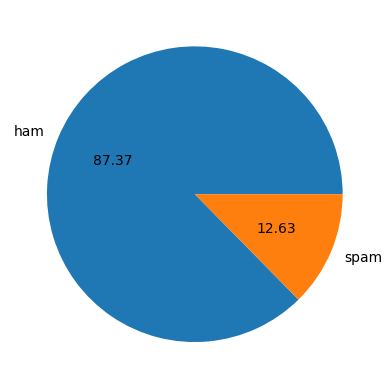

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [ ]:
import nltk

In [ ]:
#Number of Characters
df['num_char'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import nltk
nltk.download('all')

In [ ]:
# Number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
# Number of Sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# For All Messages
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# For Ham
df[df['target']==0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# For Scam
df[df['target']==1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

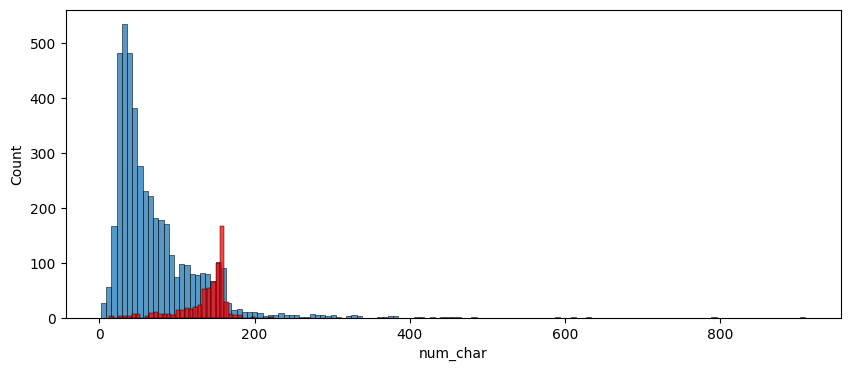

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

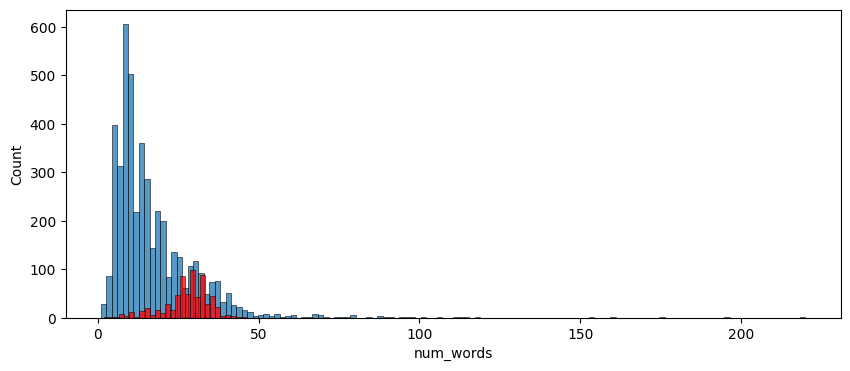

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')

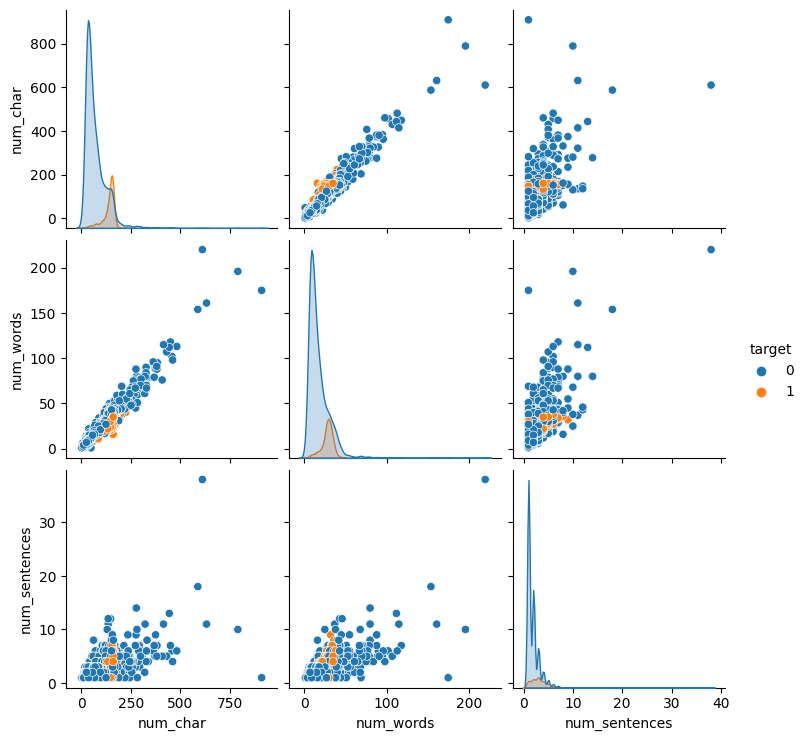

In [ ]:
sns.pairplot(df,hue="target")

In [ ]:
df.corr()

<ipython-input-38-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,target,num_char,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_char,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<ipython-input-39-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

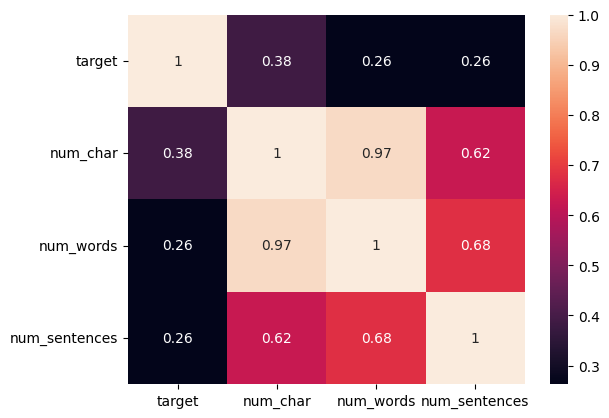

In [ ]:
sns.heatmap(df.corr(),annot=True)

#**3. Data Preprocessing**
*   Lowercase
*   Tokenization
*   Removing Special Characters
*   Removing Stop Words and Punctuation
*   Stemming


In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
def transform_text(text):
  text=text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
transform_text('Did you do lunch today? and by the way he Dances')

'lunch today way danc'

In [ ]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head(5)

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height=1000, margin=2, min_font_size=8, background_color="white")

In [ ]:
spam_wc = wc.generate(df[df['target']==1]["transformed_text"].str.cat(sep=" "))

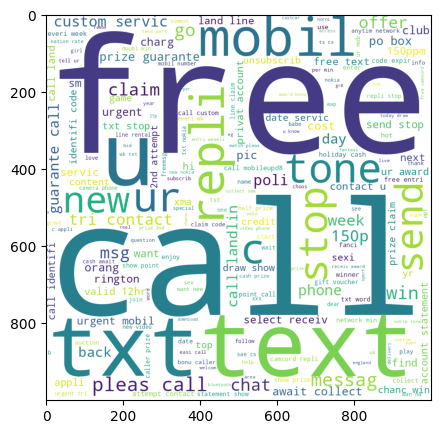

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(spam_wc)

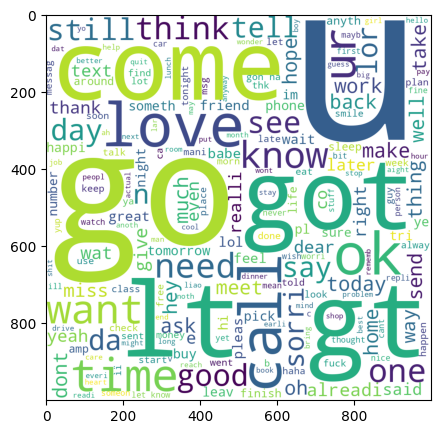

In [ ]:
ham_wc = wc.generate(df[df['target']==0]["transformed_text"].str.cat(sep=" "))
plt.figure(figsize=(5,5))
plt.imshow(spam_wc)

In [ ]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df["target"]==1]["transformed_text"].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

In [ ]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


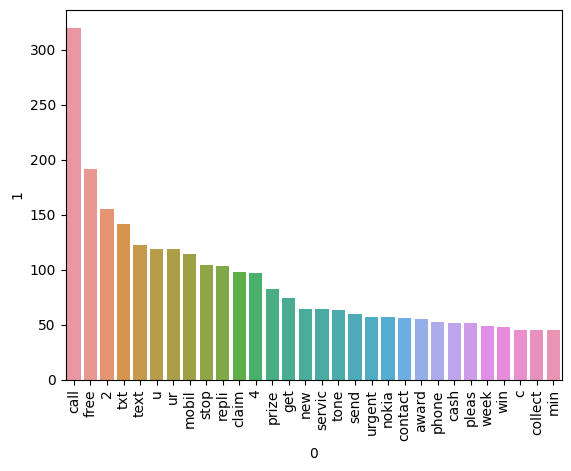

In [ ]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
#[0] is first coloumn in pd.DataFrame and [1] is second
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df["target"]==0]["transformed_text"].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35404

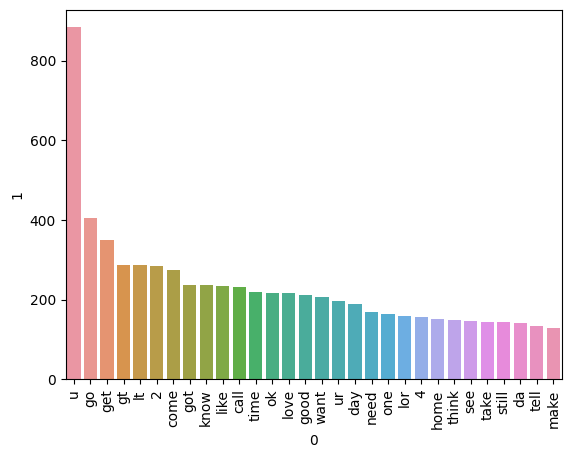

In [ ]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y = pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

#**Model Building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [ ]:
X = cv.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6708)

In [ ]:
Y = df['target'].values
Y.shape

(5169,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mlb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [ ]:
mlb.fit(X_train, Y_train)
Y_pred2 = mlb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [ ]:
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 6708)

In [ ]:
Y = df['target'].values
Y.shape

(5169,)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [ ]:
mlb.fit(X_train, Y_train)
Y_pred2 = mlb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [ ]:
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
# So we have choosen TFIDF ---> MNB
# Because it is giving precision score of 1 and in such classification problem we give more weightage to precision score over accuracy score.
# Now lets compare this with other models and find out which give us best result fin this situation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth= 7)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimator = 50, random_state=2)

In [ ]:
clfs = {
    'LR' : lrc,
    'SVC' : svc,
    'KNC' : knc,
    'MNB' : mnb,
    'DTC' : dtc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BC' : bc,
    'ETC' : etc,
    'GBC' : gbc,
    'XGB' : xgb
}

In [ ]:
def train_classifer(clf, X_train, X_test, Y_train, Y_test):
  clf.fit(X_train,Y_train)
  Y_pred = clf.predict(X_test)
  accuracy = accuracy_score(Y_test, Y_pred)
  precision = precision_score(Y_test, Y_pred)

  return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

  current_accuracy, current_precision = train_classifer(clf, X_train, X_test, Y_train, Y_test)
  print('For', name)
  print('Accuracy: ', current_accuracy)
  print('Precision: ', current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For LR
Accuracy:  0.9516441005802708
Precision:  0.94
For SVC
Accuracy:  0.9729206963249516
Precision:  0.9741379310344828
For KNC
Accuracy:  0.9003868471953579
Precision:  1.0
For MNB
Accuracy:  0.9593810444874274
Precision:  1.0
For DTC
Accuracy:  0.9487427466150871
Precision:  0.8571428571428571
For RF
Accuracy:  0.971953578336557
Precision:  1.0
For AdaBoost
Accuracy:  0.9613152804642167
Precision:  0.9454545454545454
For BC
Accuracy:  0.9584139264990329
Precision:  0.8625954198473282
For ETC
Accuracy:  0.9729206963249516
Precision:  0.9824561403508771
For GBC
Accuracy:  0.9526112185686654
Precision:  0.9238095238095239
[06:45:29] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

For XGB
Accuracy:  0.9738878143133463
Precision:  0.937007874015748


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
2,KNC,0.900387,1.000000
3,MNB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
1,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
0,LR,0.951644,0.940000
10,XGB,0.973888,0.937008
9,GBC,0.952611,0.923810
7,BC,0.958414,0.862595


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')
performance_df1

,Algorithm,variable,value
0,KNC,Accuracy,0.900387
1,MNB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LR,Accuracy,0.951644
7,XGB,Accuracy,0.973888
8,GBC,Accuracy,0.952611
9,BC,Accuracy,0.958414


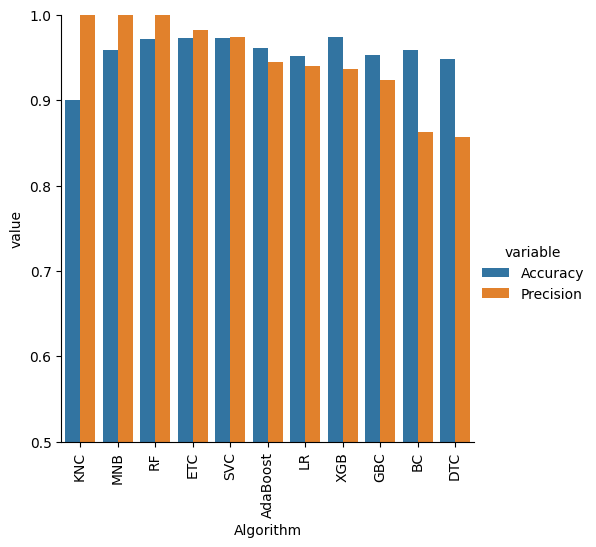

In [ ]:
sns.catplot(data = performance_df1, x = 'Algorithm', y='value', hue='variable', kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mlb,open('model.pkl','wb'))

#Model Improvement


1.   Change the max Feature parameter of tfidf



In [ ]:
tfidf_3000 = TfidfVectorizer(max_features= 3000)

In [ ]:
X = tfidf_3000.fit_transform(df['transformed_text']).toarray()
Y = df['target'].values

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
accuracy_scores_3000 = []
precision_scores_3000 = []

for name,clf in clfs.items():

  current_accuracy, current_precision = train_classifer(clf, X_train, X_test, Y_train, Y_test)
  print('For', name)
  print('Accuracy: ', current_accuracy)
  print('Precision: ', current_precision)

  accuracy_scores_3000.append(current_accuracy)
  precision_scores_3000.append(current_precision)

For LR
Accuracy:  0.9584139264990329
Precision:  0.9702970297029703
For SVC
Accuracy:  0.9758220502901354
Precision:  0.9747899159663865
For KNC
Accuracy:  0.9052224371373307
Precision:  1.0
For MNB
Accuracy:  0.9709864603481625
Precision:  1.0
For DTC
Accuracy:  0.9361702127659575
Precision:  0.8461538461538461
For RF
Accuracy:  0.9758220502901354
Precision:  0.9829059829059829
For AdaBoost
Accuracy:  0.960348162475822
Precision:  0.9292035398230089
For BC
Accuracy:  0.9584139264990329
Precision:  0.8682170542635659
For ETC
Accuracy:  0.9748549323017408
Precision:  0.9745762711864406
For GBC
Accuracy:  0.9468085106382979
Precision:  0.9191919191919192
[06:50:41] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.

For XGB
Accuracy:  0.971953578336557
Precision:  0.936


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores_3000, 'Precision_max_ft_3000': precision_scores_3000}).sort_values('Precision_max_ft_3000', ascending=False)
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
2,KNC,0.905222,1.000000
3,MNB,0.970986,1.000000
5,RF,0.975822,0.982906
1,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
0,LR,0.958414,0.970297
10,XGB,0.971954,0.936000
6,AdaBoost,0.960348,0.929204
9,GBC,0.946809,0.919192
7,BC,0.958414,0.868217


In [ ]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KNC,0.900387,1.000000,0.905222,1.000000
1,MNB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297
7,XGB,0.973888,0.937008,0.971954,0.936000
8,GBC,0.952611,0.923810,0.946809,0.919192
9,BC,0.958414,0.862595,0.958414,0.868217


# Voting Classifer
Goal is to improve accuracy from 97% and maintaining accuracy 1.

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
rfc2 = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('rf',rfc2),('et',etc)],voting='soft')

In [ ]:
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
Y_pred = voting.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print('Precision: ', precision_score(Y_test, Y_pred))

Accuracy:  0.9796905222437138
Precision:  0.9915966386554622


In [ ]:
# Applying Stacking
estimators=[('svm', svc), ('nb', mnb), ('rf',rfc2),('et',etc)]
final_estimator = RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train, Y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=2)),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [ ]:
Y_pred = clf.predict(X_test)
print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print('Precision: ', precision_score(Y_test, Y_pred))

Now we will **pickle** i.e. we will export our model and function out so that it can be used.